# Underwater image processing - David and Gabriel - MVA 2023/2024

## Classical algorithms
---

# 1.A.1. Gray-world

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from skimage.io import imread, imshow
from skimage import img_as_ubyte
from skimage import io
from skimage.metrics import structural_similarity as ssim
import cv2

def gray_world(image_path, output_path):

  image = io.imread(image_path)

  image_gray_world = ((image* (image.mean() / image.mean(axis=(0, 1))))
             .clip(0, 255).astype(int))
  fig, ax = plt.subplots(1,2, figsize=(10,6))

  ax[0].imshow(image)
  ax[0].set_title('Original Image')
  ax[0].axis('off')
  ax[1].imshow(image_gray_world)
  ax[1].set_title('Gray-world Corrected Image')
  ax[1].axis('off')

  io.imsave(output_path, img_as_ubyte(image_gray_world),format='jpg')

  # We compute the SSIM:
  ssim_index = ssim(image, image_gray_world, channel_axis=-1)

  print("--------------------")
  print(f"SSIM: {ssim_index}")


/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


--------------------
SSIM: 0.7568105986895759


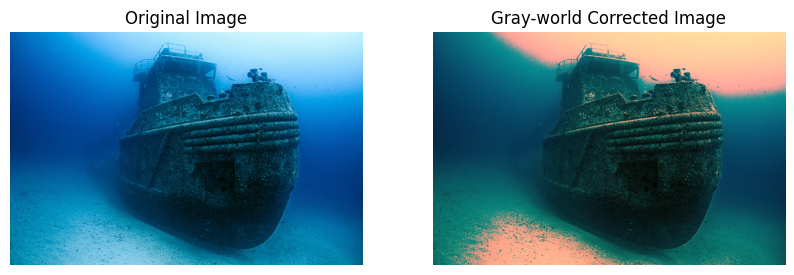

In [ ]:
image_path = '/content/fotobarco.jpg'
output_path = "fotobarco_GW.jpg"
gray_world(image_path, output_path)

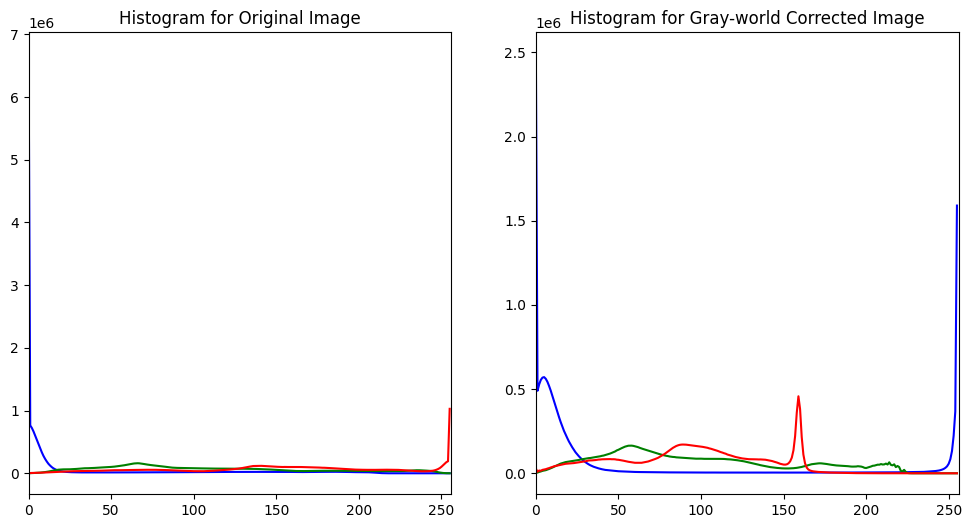

In [ ]:
# Histogram
import cv2
image = cv2.imread(image_path)
image_GW = cv2.imread(output_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_GW = cv2.cvtColor(image_GW, cv2.COLOR_BGR2RGB)

# Plot histograms for the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Histogram for Original Image')
for i, col in enumerate(('b', 'g', 'r')):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

# Plot histograms for the modified image (image_GW)
plt.subplot(1, 2, 2)
plt.title('Histogram for Gray-world Corrected Image')
for i, col in enumerate(('b', 'g', 'r')):
    histr = cv2.calcHist([image_GW], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

plt.show()

#1.A.2. White patch

In [ ]:
def white_patch(image_path, percentile):
  # Percentile: value to consider as channel maximum

    image = io.imread(image_path)

    white_patch_image = img_as_ubyte(
        (image * 1.0 / np.percentile(image,
                                     percentile,
                                     axis=(0, 1))).clip(0, 1))
    # Plot the comparison between the original and white patch corrected images
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(white_patch_image)
    ax[1].set_title(f'White Patch Corrected Image, percentile={percentile}')
    ax[1].axis('off')
    plt.show()
    output_path = "570_WP.jpg"
    io.imsave(output_path, img_as_ubyte(white_patch_image),format='png')
    # We compute the SSIM:
    ssim_index = ssim(image, white_patch_image, channel_axis=-1)

    print(f"SSIM: {ssim_index}")
    print("--------------------")

<ipython-input-4-cfb3cd705197>:7: RuntimeWarning: divide by zero encountered in divide
  (image * 1.0 / np.percentile(image,
<ipython-input-4-cfb3cd705197>:7: RuntimeWarning: invalid value encountered in divide
  (image * 1.0 / np.percentile(image,


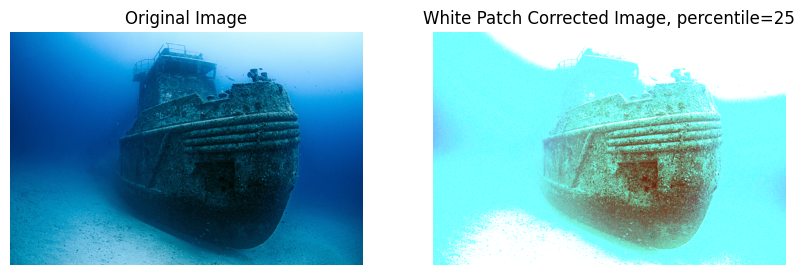

SSIM: 0.32353526441780533
--------------------


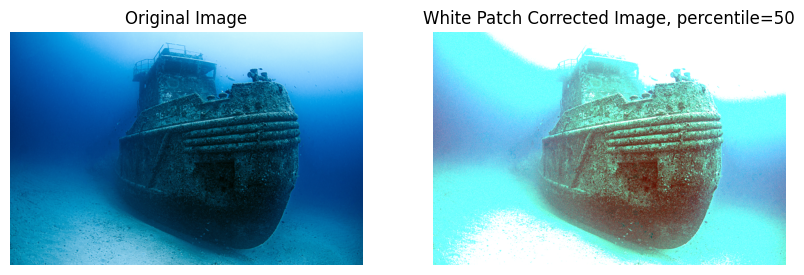

SSIM: 0.41574887474885397
--------------------


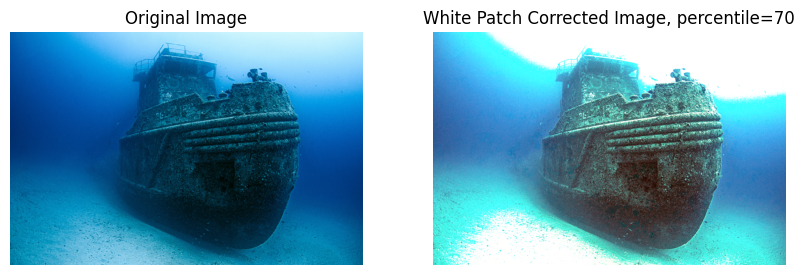

SSIM: 0.5388687819073802
--------------------


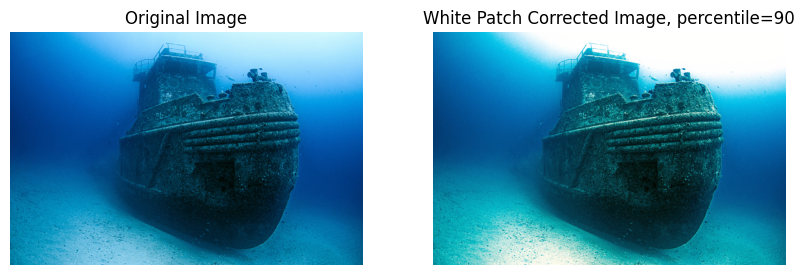

SSIM: 0.898913177309224
--------------------


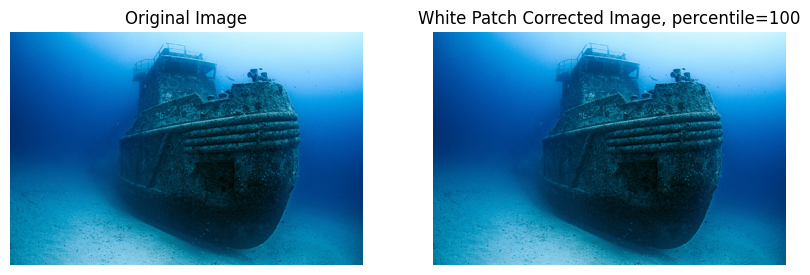

SSIM: 1.0
--------------------


In [ ]:
image_path = "/content/fotobarco.jpg"

for per in [25,50,70,90,100]:
    white_patch(image_path, percentile=per)


# 1.A.3. Combining both algorithms

In [ ]:
def grayworldwhite(image_path,percentile):
    image = io.imread(image_path)
    image_gray_world = ((image* (image.mean() / image.mean(axis=(0, 1)))).clip(0, 255).astype(int))
    whiteGW_image = img_as_ubyte((image_gray_world * 1.0 / np.percentile(image_gray_world, percentile, axis=(0, 1))).clip(0, 1))

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(whiteGW_image)
    ax[1].set_title(f'Gray-World + White Patch Corrected Image, percentile={percentile}')
    ax[1].axis('off')

    plt.show()

    # We compute the SSIM:
    ssim_index = ssim(image, whiteGW_image, channel_axis=-1)

    print(f"SSIM between original/wp+gw: {ssim_index}")
    print("--------------------")

    return whiteGW_image


def whitegrayworld(image_path,percentile):
    image = io.imread(image_path)
    white_image = img_as_ubyte((image * 1.0 / np.percentile(image, percentile, axis=(0, 1))).clip(0, 1))
    GWwhite_image = ((white_image* (white_image.mean() / white_image.mean(axis=(0, 1)))).clip(0, 255).astype(int))

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(GWwhite_image)
    ax[1].set_title(f'White Patch + Gray-World Corrected Image, percentile={percentile}')
    ax[1].axis('off')

    plt.show()

    # We compute the SSIM:
    ssim_index = ssim(image, GWwhite_image, channel_axis=-1)

    print(f"SSIM between original and gw+wp: {ssim_index}")
    print("--------------------")

    return GWwhite_image

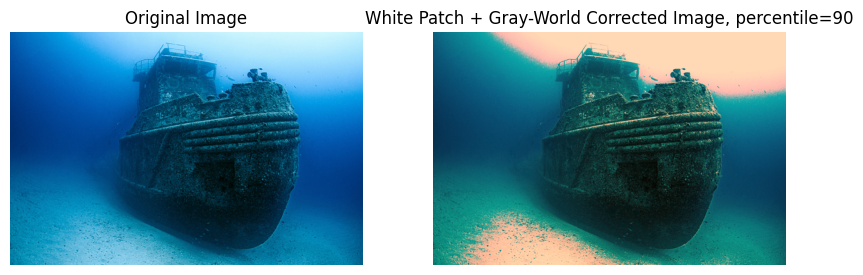

SSIM between original and gw+wp: 0.731487258969973
--------------------


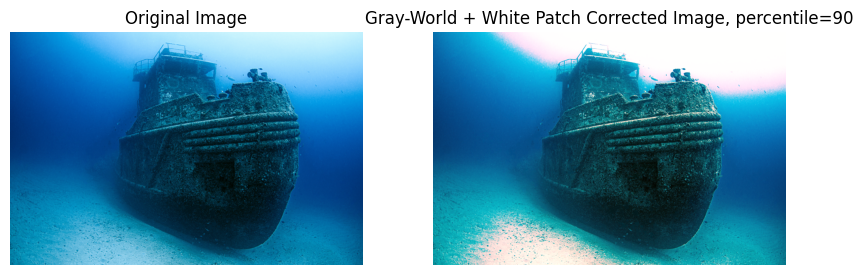

SSIM between original/wp+gw: 0.7910546499310844
--------------------
SSIM between corrected images: 1.0
--------------------


In [ ]:
image_path = "/content/fotobarco.jpg"

im1 = whitegrayworld(image_path, percentile=90)
im2 = grayworldwhite(image_path, percentile=90)

# We compute the SSIM:
ssim_index = ssim(im1, im2, channel_axis=-1)

print(f"SSIM between corrected images: {ssim_index}")
print("--------------------")